In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [12]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [16]:
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [6]:
train_images[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

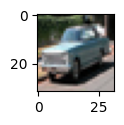

In [7]:
plt.figure(figsize=(1, 1))
plt.imshow(train_images[32])

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [18]:
val_images = train_images[45000:]
val_labels = train_labels[45000:]

train_images = train_images[:45000]
train_labels = train_labels[:45000]

In [10]:
mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

c:\Users\wwwch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [13]:
mlp_model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2693 - loss: 2.0044 - val_accuracy: 0.3608 - val_loss: 1.7553
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3849 - loss: 1.7087 - val_accuracy: 0.3990 - val_loss: 1.6683
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4240 - loss: 1.6072 - val_accuracy: 0.4158 - val_loss: 1.6058
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4436 - loss: 1.5540 - val_accuracy: 0.4504 - val_loss: 1.5483
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4572 - loss: 1.5119 - val_accuracy: 0.4672 - val_loss: 1.5056


In [8]:
mlp_model.evaluate(test_images, test_labels)

NameError: name 'mlp_model' is not defined

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [13]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])

c:\Users\wwwch\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
cnn_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       262,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
cnn_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [7]:
from tensorflow.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
save_best_only = ModelCheckpoint('best_cifar10_cnn_model.h5', save_best_only=True)

ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=best_cifar10_cnn_model.h5

In [21]:
history = cnn_model.fit(train_images, train_labels, batch_size=512, epochs=100, validation_data=(val_images, val_labels), callbacks=[early_stopping, save_best_only])

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.2021 - loss: 2.1404 - val_accuracy: 0.4258 - val_loss: 1.6107
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.3871 - loss: 1.6935 - val_accuracy: 0.4994 - val_loss: 1.4124
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.4471 - loss: 1.5153 - val_accuracy: 0.5578 - val_loss: 1.2512
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.4971 - loss: 1.4045 - val_accuracy: 0.5922 - val_loss: 1.1733
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.5298 - loss: 1.3174 - val_accuracy: 0.5750 - val_loss: 1.1803
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.5553 - loss: 1.2640 - val_accuracy: 0.6300 - val_loss: 1.0501
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5756 - loss: 1.2003 - val_accuracy: 0.6530 - val_loss: 0.9954
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.5899 - loss: 1.1684 - val_accuracy: 0.

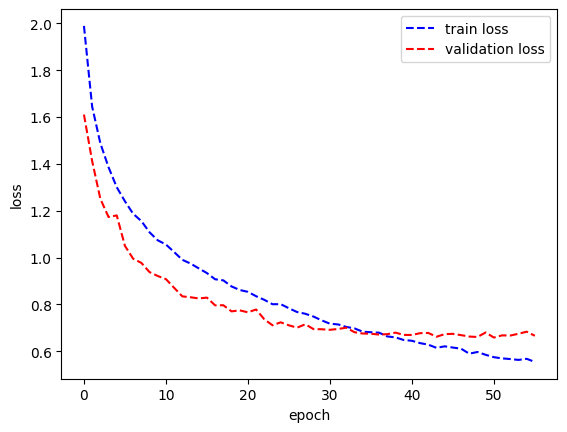

In [22]:
plt.plot(history.history['loss'], 'b--')
plt.plot(history.history['val_loss'], 'r--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [23]:
cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 0.6961


[0.7116499543190002, 0.7652000188827515]

In [25]:
predicted_labels = cnn_model.predict(test_images)
predicted_labels.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 10)

In [26]:
import tensorflow as tf

predicted_labels = tf.argmax(predicted_labels, axis=1)
predicted_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([3, 8, 8, ..., 5, 4, 7], dtype=int64)>

In [27]:
label_to_name = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

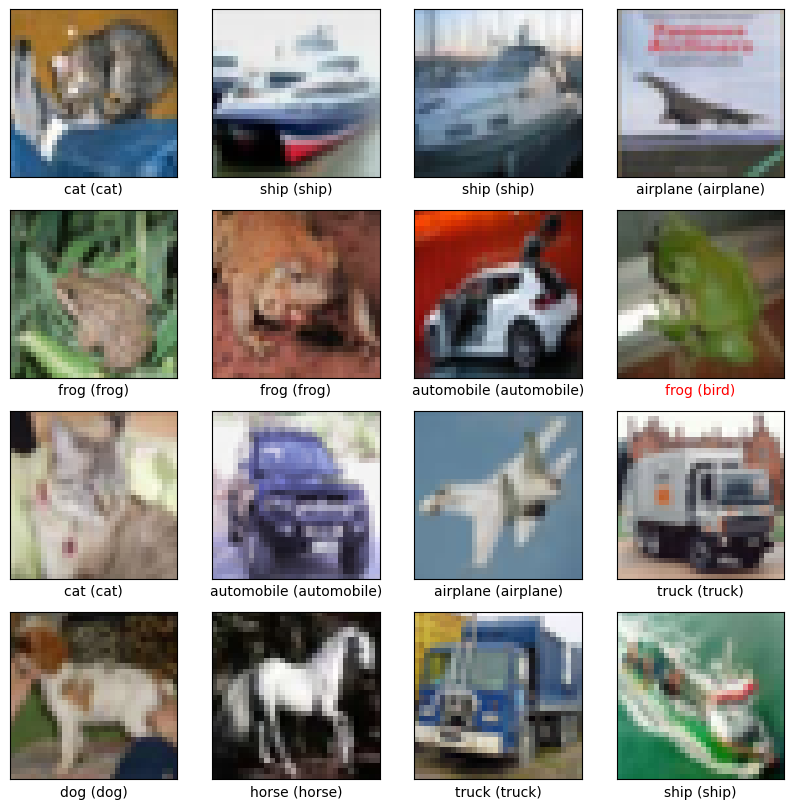

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    xlabel = f"{label_to_name[int(test_labels[i][0])]} ({label_to_name[int(predicted_labels[i])]})"
    plt.xlabel(xlabel, color='red' if test_labels[i][0] != predicted_labels[i] else 'black')

In [30]:
cnn_model.save('my_model.h5')

TypeError: Model.save() missing 1 required positional argument: 'filepath'

In [4]:
import tensorflow as tf
import numpy as np

##########모델 로드

model = tf.keras.models.load_model('model/my_model.h5')



  # 변수로 저장되어 있는 모델을, TFLite 모델로 변환
converter = tf.lite.TFLiteConverter.from_keras_model(model)


In [5]:
import tensorflow as tf

# TFLite 모델 불러오기
interpreter = tf.lite.Interpreter(model_path="C:/study/test.tflite")
interpreter.allocate_tensors()

# 입력 텐서 정보 확인
input_details = interpreter.get_input_details()
print(input_details)

[{'name': 'serving_default_input_layer_1:0', 'index': 0, 'shape': array([ 1, 32, 32,  3]), 'shape_signature': array([-1, 32, 32,  3]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [6]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# 변환된 모델 저장
with open('model_quantized.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\wwwch\AppData\Local\Temp\tmpi95rikdq\assets


INFO:tensorflow:Assets written to: C:\Users\wwwch\AppData\Local\Temp\tmpi95rikdq\assets


Saved artifact at 'C:\Users\wwwch\AppData\Local\Temp\tmpi95rikdq'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1502505651088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505654544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505654928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505655696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505655888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505656656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505657040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505658192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505658576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505659728: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [7]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(train_images, _), (_, _) = cifar10.load_data()

# 데이터 전처리: 이미지를 [0, 255] 범위로 정규화 (int8 양자화에 맞게)
train_images = train_images.astype('float32') / 255.0

# 대표 데이터셋 생성 함수 (양자화에 사용)
def representative_data_gen():
    for input_value in train_images[:100]:  # 100개의 샘플 사용
        input_value = tf.expand_dims(input_value, axis=0)
        yield [input_value]



In [8]:
# 양자화 설정
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # 모델 불러오기
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # 입력 타입을 int8로 설정
converter.inference_output_type = tf.int8  # 출력 타입을 int8로 설정

# 양자화된 모델 변환
tflite_quant_model = converter.convert()

# 모델 저장
with open('model_quantized_int8.tflite', 'wb') as f:
    f.write(tflite_quant_model)


INFO:tensorflow:Assets written to: C:\Users\wwwch\AppData\Local\Temp\tmpq3cy_l1d\assets


INFO:tensorflow:Assets written to: C:\Users\wwwch\AppData\Local\Temp\tmpq3cy_l1d\assets


Saved artifact at 'C:\Users\wwwch\AppData\Local\Temp\tmpq3cy_l1d'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  1502505651088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505654544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505654928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505655696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505655888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505656656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505657040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505658192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505658576: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1502505659728: TensorSpec(shape=(), dtype=tf.resource, name=None)


c:\Users\wwwch\AppData\Local\Programs\Python\Python312\Lib\site-packages\tensorflow\lite\python\convert.py:983: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# CIFAR-10 데이터셋 로드
(train_images, _), (_, _) = cifar10.load_data()
train_images = train_images.astype('float32') / 255.0

# 대표 데이터셋 생성
def representative_data_gen():
    for input_value in train_images[:100]:
        input_value = tf.expand_dims(input_value, axis=0)
        yield [input_value]

# Keras 모델 불러오기 및 양자화
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

# 양자화를 위한 완전 정수화 설정
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # 입력을 int8로 설정
converter.inference_output_type = tf.int8  # 출력을 int8로 설정

# 모델을 양자화하여 변환
tflite_quant_model = converter.convert()

# 양자화된 모델을 파일로 저장
with open('model_quantized_int8.tflite', 'wb') as f:
    f.write(tflite_quant_model)


NameError: name 'model' is not defined

In [10]:
interpreter = tf.lite.Interpreter(model_path="model_quantized_int8.tflite")
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print("Input Type:", input_details[0]['dtype'])  # int8이어야 함
print("Output Type:", output_details[0]['dtype'])  # int8이어야 함


Input Type: <class 'numpy.int8'>
Output Type: <class 'numpy.int8'>
